In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
 
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import objdet.object_detector
import sklearn.base as be
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier


import warnings
warnings.filterwarnings('ignore')

C:\Users\Maria\Miniconda3\envs\objdet\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
def load_dataset(n_samples=40):
    download_dir = r"C:\Users\Maria\Documents\TU Delft\Medical Visualization\Proyecto Clinical Graphics\Object_Detection_in_Medical_Images-2015-11-17\Object Detection in Medical Images\Images"
    boxes = np.load(os.path.join(download_dir, "boxes.npy"))[:n_samples]
    images = []
    for i in range(n_samples):
        image = np.load(os.path.join(download_dir, "image{0:03d}.npy".format(i)))
        images.append(image)
    return boxes, images
boxes, images = load_dataset()

In [3]:
for i, (box, img) in enumerate(zip(boxes, images)):
    # plot image, contour and normal points
    #fig, ax = plt.subplots()
    #fig.suptitle("image {}".format(i))
    #ax.imshow(img.T, cmap=matplotlib.cm.gray)
    #ax.plot(box[:, 0], box[:, 1], "-")
    #ax.set_aspect('equal')
    
    if i == 5:  # use this to stop plotting after the i -th image, or remove to plot all images
        break


In [4]:
select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 
compare=1   
if compare:
    #test_cls=['RandomForest','KNeighborsClassifier','SVC','AdaBoostClassifier','GaussianNB','LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']
    #test_cls=['KNeighborsClassifier_k1','KNeighborsClassifier_k2','KNeighborsClassifier_k5','KNeighborsClassifier_k10','KNeighborsClassifier_k20','KNeighborsClassifier_k30','KNeighborsClassifier_k50']
    test_overlap_threshold_nms=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]
    scores_per_cls=np.zeros((9,len(test_cls)))
    mean_scores=[]
    for index,clsf in enumerate(test_cls):
        print('classifier=')
        print(clsf)
        for thr in test_overlap_threshold_nms:
            print('thr value=')
            print(thr)
            detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                                scale_fraction=0.0625, 
                                                                overlap_threshold_original=0.6,
                                                                orientations=9, pixels_per_cell=(32, 32), 
                                                                cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                                overlap_threshold_nms=thr,
                                                                clasfr=clsf)
            detector.fit(train_images, train_boxes, debug=False)
            predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
            mean_score_prob,mean_score_nms = detector.score(test_images, test_boxes,
                                                            predicted_boxes_prob, predicted_boxes_nms, debug=False)
            mean_scores.append(mean_score_nms)
        scores_per_cls[:,index]=mean_scores
        mean_scores=[]
    print(scores_per_cls)
    print('********END OF PROGRAM********')
    print(test_cls)
                
                
if compare==0:
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.4,
                                                        clasfr='KNeighborsClassifier_k10')

# Possible classifiers:
# clasfr= 'RandomForest'
# clasfr= 'KNeighborsClassifier'
# clasfr= 'SVC'

# clasfr= 'AdaBoostClassifier'
# clasfr= 'DecisionTreeClassifier'  
# clasfr= 'SVC_linear'
# clasfr= 'SVC_C0025_linear'
# clasfr= 'GaussianNB'
# clasfr= 'LinearDiscriminantAnalysis'
# clasfr= 'QuadraticDiscriminantAnalysis'


    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob,mean_score_nms = detector.score(test_images, test_boxes,predicted_boxes_prob, predicted_boxes_nms, debug=False)

    print('mean_score_prob=', mean_score_prob)
    print('mean_score_nms=', mean_score_nms)


classifier=
KNeighborsClassifier_k1
thr value=
0.1
thr value=
0.2
thr value=
0.3
thr value=
0.4
thr value=
0.5
thr value=
0.6
thr value=
0.7
thr value=
0.8
thr value=
0.9
classifier=
KNeighborsClassifier_k2
thr value=
0.1
thr value=
0.2
thr value=
0.3
thr value=
0.4
thr value=
0.5
thr value=
0.6
thr value=
0.7
thr value=
0.8
thr value=
0.9
classifier=
KNeighborsClassifier_k5
thr value=
0.1
thr value=
0.2
thr value=
0.3
thr value=
0.4
thr value=
0.5
thr value=
0.6
thr value=
0.7
thr value=
0.8
thr value=
0.9
classifier=
KNeighborsClassifier_k10
thr value=
0.1
thr value=
0.2
thr value=
0.3
thr value=
0.4
thr value=
0.5
thr value=
0.6
thr value=
0.7
thr value=
0.8
thr value=
0.9
classifier=
KNeighborsClassifier_k20
thr value=
0.1
thr value=
0.2
thr value=
0.3
thr value=
0.4
thr value=
0.5
thr value=
0.6
thr value=
0.7
thr value=
0.8
thr value=
0.9
classifier=
KNeighborsClassifier_k30
thr value=
0.1
thr value=
0.2
thr value=
0.3
thr value=
0.4
thr value=
0.5
thr value=
0.6
thr value=
0.7
t

In [8]:
my_score_matrix=scores_per_cls

print(my_score_matrix)

[[ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]
 [ 0.33737008  0.4500877   0.53781582  0.58021164  0.58606455  0.60702625
   0.5960793 ]]


<IPython.core.display.Javascript object>


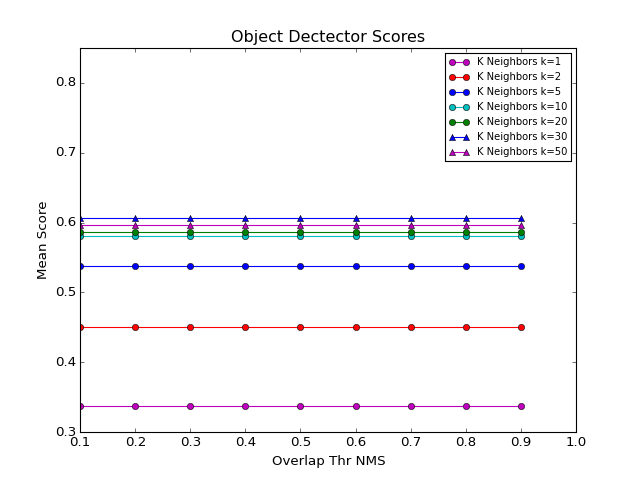

In [10]:

import pylab as pl


y1=my_score_matrix[:,0] # RandomForest classifier
y2=my_score_matrix[:,1] # KNeighbours clasf.
y3=my_score_matrix[:,2] # SVC clasf.
y4=my_score_matrix[:,3] # AdaBoost clasf.
y5=my_score_matrix[:,4] # GaussianNB clasf.
y6=my_score_matrix[:,5] # GaussianNB clasf.
y7=my_score_matrix[:,6] # GaussianNB clasf.
#y8=my_score_matrix[:,7] # GaussianNB clasf.
# y9=my_score_matrix[:,8] # GaussianNB clasf.
# y10=my_score_matrix[:,9] # GaussianNB clasf.
x=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9] # NMS overlap thrs


test_cls=['RandomForest','KNeighborsClassifier','SVC','AdaBoostClassifier','GaussianNB','LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis','SVC_linear','SVC_C0025_linear','DecisionTreeClassifier']
    
    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y1, 'm-o',label='K Neighbors k=1')
pl.plot(x, y2, 'r-o',label='K Neighbors k=2')
pl.plot(x, y3, 'b-o',label='K Neighbors k=5')
pl.plot(x, y4, 'c-o',label='K Neighbors k=10')
pl.plot(x, y5, 'g-o',label='K Neighbors k=20')
pl.plot(x, y6, 'b-^',label='K Neighbors k=30')
pl.plot(x, y7, 'm-^',label='K Neighbors k=50')
#pl.plot(x, y8, 'g-^',label='SVC linear')
#pl.plot(x, y9, 'c-^',label='SVC C=0.025 linear')
#pl.plot(x, y10, 'k-^',label='Decision Tree')



pl.xlabel('Overlap Thr NMS')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores')
pl.ylim(0.3, 0.85)
pl.legend(loc=1, prop={"size":9})


4

In [113]:


outnms= np.array([[[120, 160],
  [216, 160],
  [216 ,256],
  [120, 256]],
 [[ 20,110],
  [116,110],
  [116 ,206],
  [ 20 ,206]]])

hola,adios=np.vsplit(outnms,2)
hola=hola.tolist()
adios=adios.tolist()
outnms_list=outnms.tolist()


#outnms_list.index(hola)





[[[120, 160], [216, 160], [216, 256], [120, 256]],
 [[20, 110], [116, 110], [116, 206], [20, 206]]]

In [29]:
patches=[np.array([[ 0 ,70],  [96 , 70],  [ 96, 166],  [  0 ,166]]), np.array([[  0 , 80],  [ 96  ,80],  [ 96,176], [ 0, 176]]),np.array([[  0 , 90],  [ 96,  90],  [ 96 ,186],  [  0 ,186]])]
a=patches[0]




0
1
2


array([[ 4.,  5.,  6.],
       [ 4.,  5.,  6.],
       [ 4.,  5.,  6.]])

<IPython.core.display.Javascript object>

ValueError: Cannot convert argument type <class 'numpy.ndarray'> to rgba array